<a href="https://colab.research.google.com/github/orin00/colab/blob/main/240318_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DBSCAN

In [2]:
# DBSCAN 적용하기 – 붓꽃 데이터 셋

## 데이터셋 불러오기
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [45]:
from sklearn.cluster import DBSCAN
# eps: 최대 탐색 거리를 의미하는 epsilon 값 (얘는 크면 군집이 적어진다, 보통 소수점으로 넣는다.)
# min_samples: 최대 탐색거리내의 최소 샘플의 갯수 (얘는 크면 군집이 많아진다.)
dbscan = DBSCAN(eps=0.3, min_samples=4)
# fit_predict는 지가 알아서 train데이터와 test데이터를 나눠서 쓴다.
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
# dbscan_cluster에서 -1은 노이즈값(아무 의미 없는 데이터)

target  dbscan_cluster
0        0                38
        -1                12
1       -1                28
         2                13
         1                 4
         3                 4
         5                 1
2       -1                41
         5                 5
         4                 4
Name: dbscan_cluster, dtype: int64


In [46]:
# 시각화를 위한 함수 생성
def visualize_cluster_plot(clusterobj, dataframe, label_name):

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
    plt.legend()
    plt.show()

In [47]:
# 시각화를 위한 차원축
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

<ipython-input-46-f091c8e09613>:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,


IndexError: list index out of range

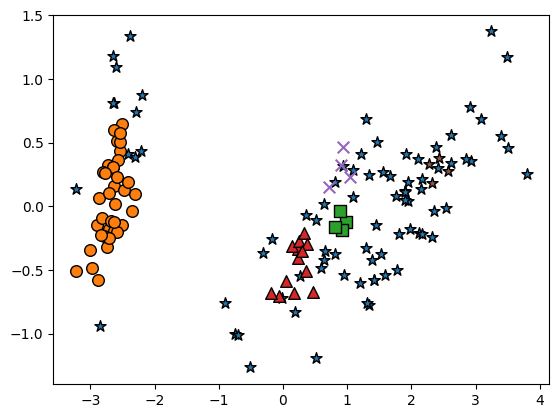

In [48]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster')

K-Means

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                random_state=0).fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
irisDF['target'] = iris.target
irisDF['cluster']= kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       0          50
1       0           3
        1          25
        2          22
2       1          41
        2           9
Name: sepal_length, dtype: int64


In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]

# PCA는 칼럼 갯수가 많은 다차원 데이터는 시각화가 불가능해서 차원을 축소해주는 코드

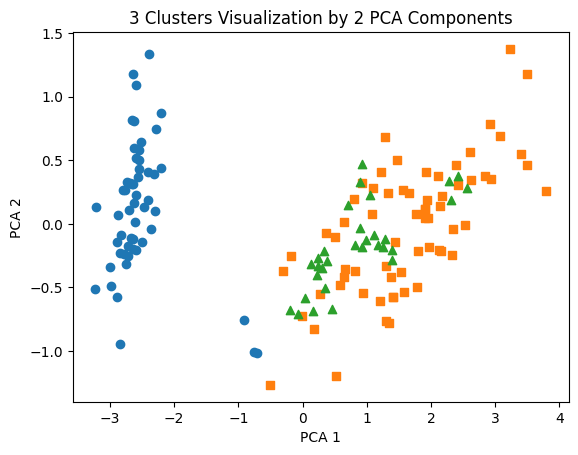

In [52]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

팽귄

In [53]:
import seaborn as sns

df = sns.load_dataset('penguins')

In [55]:
df.dropna(inplace=True)

In [56]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                random_state=0).fit(df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
df['target'] = df['species']
df['cluster']= kmeans.labels_
penguin_result = df.groupby(['target','cluster'])['island'].count()
print(penguin_result)

target     cluster
Adelie     0           34
           1          112
Chinstrap  0           15
           1           53
Gentoo     0           50
           1            1
           2           68
Name: island, dtype: int64
